In [1]:
print("Nguyễn Nguyên Huy - 6351071030")

Nguyễn Nguyên Huy - 6351071030


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from google.colab import drive
import zipfile
import os
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
zip_path = '/content/drive/MyDrive/Colab Notebooks/Data Mining/Dataset/breast+cancer+wisconsin+diagnostic.zip' #
extract_path = '/content/breast_cancer_data'

csv_file_path = os.path.join(extract_path, 'wdbc.data')

print(f"Đang đọc file: {csv_file_path}")

# 2. Tạo tên cột (Vì file csv gốc không có header)
# Cấu trúc: ID, Diagnosis, và 30 đặc trưng (Mean, SE, Worst)
features_basic = ['radius', 'texture', 'perimeter', 'area', 'smoothness',
                  'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension']

column_names = ['id', 'diagnosis']
for category in ['_mean', '_se', '_worst']:
    for feature in features_basic:
        column_names.append(feature + category)

# 3. Đọc dữ liệu
try:
    # header=None: Báo cho pandas biết file không có tiêu đề
    # names=column_names: Gán tên cột thủ công
    df = pd.read_csv(csv_file_path, header=None, names=column_names)

    print("✅ Đọc dữ liệu thành công!")
    print("\n--- 5 DÒNG ĐẦU TIÊN ---")
    display(df.head())

    # 4. Xử lý dữ liệu (Bỏ cột ID, tách nhãn)
    if 'id' in df.columns:
        df = df.drop('id', axis=1)
        print("-> Đã bỏ cột 'id'")

    # Tách X (Features) và y (Target - Diagnosis)
    y = df['diagnosis'] # M hoặc B
    X = df.drop('diagnosis', axis=1)

    print("\n--- THÔNG TIN DỮ LIỆU (Sau khi xử lý) ---")
    print(f"Số lượng mẫu: {X.shape[0]}")
    print(f"Số lượng đặc trưng: {X.shape[1]}")

    # 5. Mã hóa nhãn y (M -> 1, B -> 0)
    # Để sau này tiện so sánh (Malignant = Ác tính, Benign = Lành tính)
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # 6. Chuẩn hóa dữ liệu (StandardScaler)
    # Bước này cực kỳ quan trọng cho thuật toán gom cụm
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Tạo DataFrame chuẩn hóa để dễ dùng cho các bước sau
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

    print("\n✅ Dữ liệu đã sẵn sàng cho gom cụm (đã được chuẩn hóa về Mean=0, Std=1).")

except FileNotFoundError:
    print(f"❌ Vẫn chưa tìm thấy file tại: {csv_file_path}")
    print("Bạn hãy kiểm tra lại xem file 'wdbc.data' có nằm đúng trong thư mục '/content/breast_cancer_data' không nhé.")

Đang đọc file: /content/breast_cancer_data/wdbc.data
✅ Đọc dữ liệu thành công!

--- 5 DÒNG ĐẦU TIÊN ---


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


-> Đã bỏ cột 'id'

--- THÔNG TIN DỮ LIỆU (Sau khi xử lý) ---
Số lượng mẫu: 569
Số lượng đặc trưng: 30

✅ Dữ liệu đã sẵn sàng cho gom cụm (đã được chuẩn hóa về Mean=0, Std=1).


Kích thước dữ liệu gốc: (569, 30)
Kích thước dữ liệu sau PCA: (569, 2)


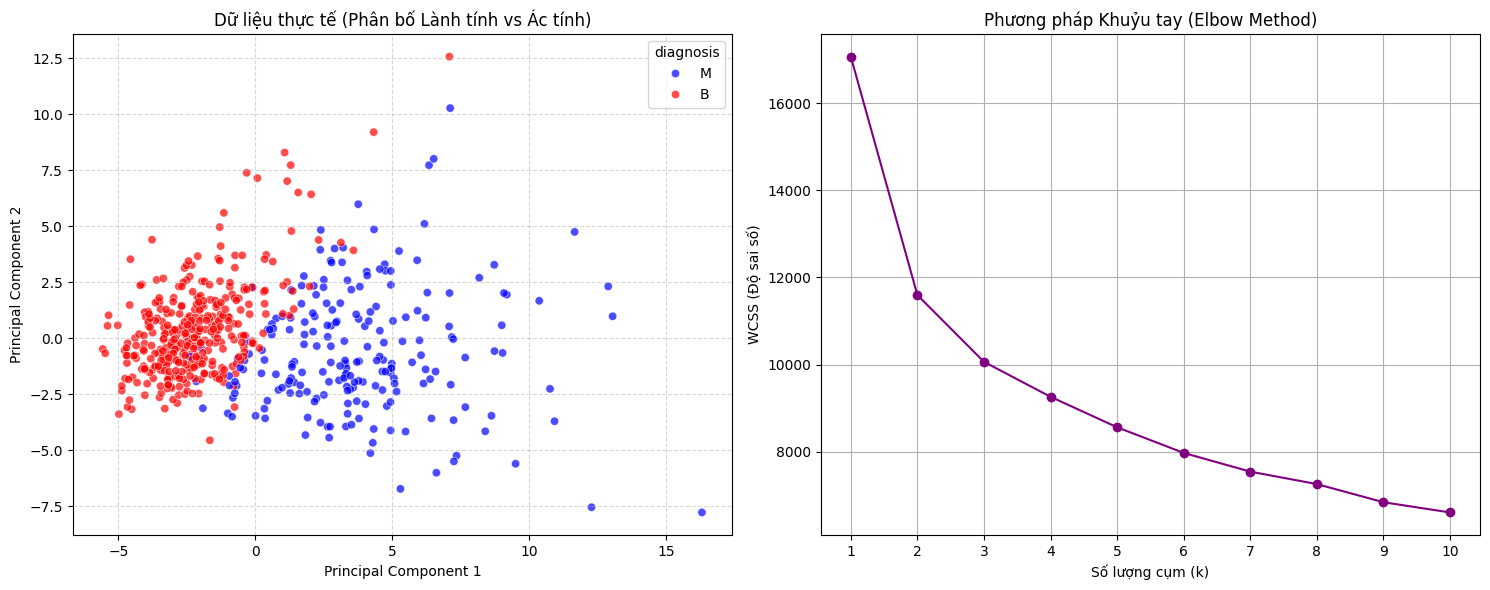

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Kích thước dữ liệu gốc: {X_scaled.shape}")
print(f"Kích thước dữ liệu sau PCA: {X_pca.shape}")

# Vẽ biểu đồ phân tán trên không gian 2D
plt.figure(figsize=(15, 6))

# --- Biểu đồ 1: Dữ liệu thực tế (Ground Truth) ---
# Màu sắc dựa trên nhãn y thực tế (để xem dữ liệu có thực sự tách biệt không)
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette=['blue', 'red'], alpha=0.7)
plt.title('Dữ liệu thực tế (Phân bố Lành tính vs Ác tính)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, linestyle='--', alpha=0.5)

# PHƯƠNG PHÁP KHUỶU TAY (ELBOW METHOD)
wcss = []
k_range = range(1, 11)

for i in k_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled) # Lưu ý: Nên fit trên dữ liệu gốc đã chuẩn hóa (30 chiều)
    wcss.append(kmeans.inertia_)

# --- Biểu đồ 2: Đường khuỷu tay ---
plt.subplot(1, 2, 2)
plt.plot(k_range, wcss, marker='o', color='purple')
plt.title('Phương pháp Khuỷu tay (Elbow Method)')
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('WCSS (Độ sai số)')
plt.grid(True)
plt.xticks(k_range)

plt.tight_layout()
plt.show()

 Nhãn đã khớp chiều. Độ chính xác: 0.91

--- BÁO CÁO PHÂN LOẠI (CLUSTERING REPORT) ---
               precision    recall  f1-score   support

Lành tính (B)       0.90      0.95      0.93       357
  Ác tính (M)       0.91      0.83      0.87       212

     accuracy                           0.91       569
    macro avg       0.91      0.89      0.90       569
 weighted avg       0.91      0.91      0.90       569



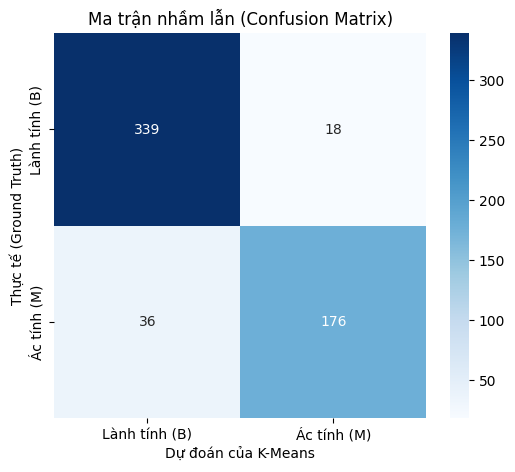

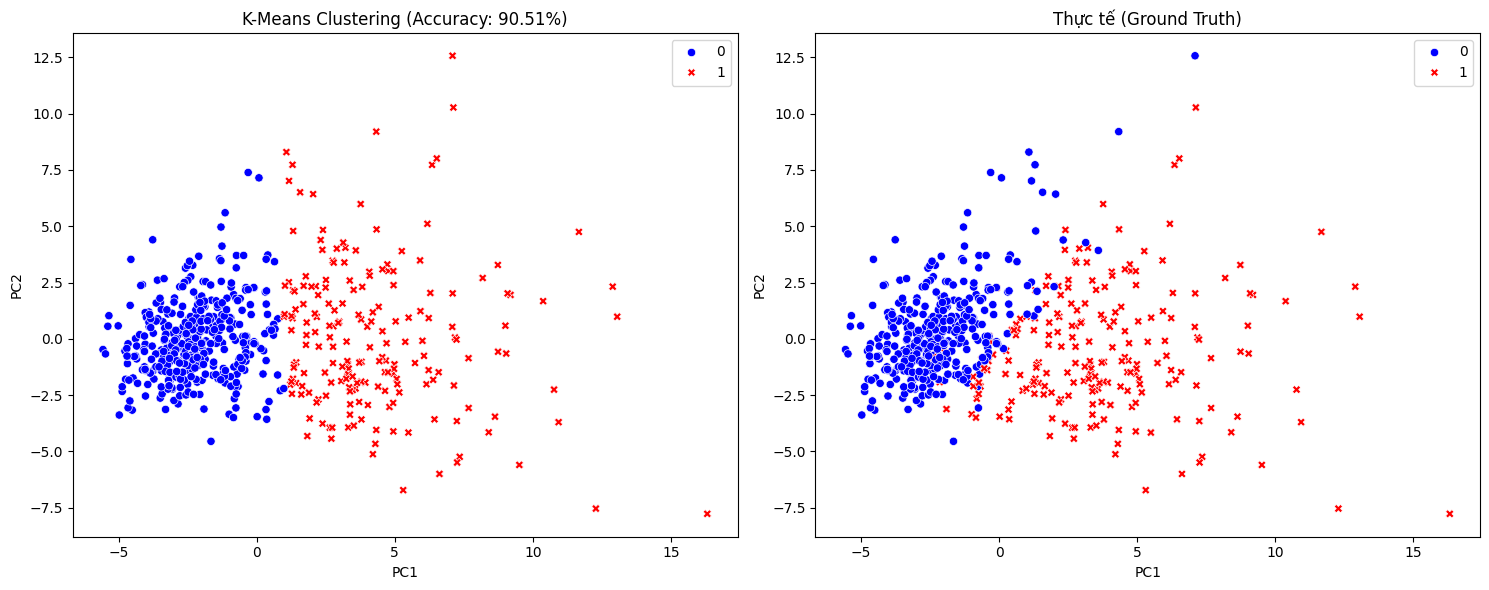

In [12]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42, n_init=10)
# Thuật toán sẽ gán nhãn 0 hoặc 1 cho mỗi điểm dữ liệu
clusters = kmeans.fit_predict(X_scaled)

# XỬ LÝ ĐỒNG BỘ NHÃN (LABEL MAPPING) - QUAN TRỌNG
# ---------------------------------------------------------
# Vấn đề: K-Means không biết đâu là "Ác tính", đâu là "Lành tính".

# y_encoded là biến chứa nhãn thực tế đã mã hóa ở Task 1 (M=1, B=0)
le = LabelEncoder()
y_encoded = le.fit_transform(y) # M->1, B->0

# Tính độ chính xác thử
acc = accuracy_score(y_encoded, clusters)

if acc < 0.5:
    print(f" Phát hiện nhãn bị ngược (Accuracy={acc:.2f}). Đang đảo lại nhãn (0 <-> 1)...")
    # Đảo nhãn: 0 thành 1, 1 thành 0
    clusters = 1 - clusters
    acc = accuracy_score(y_encoded, clusters)
    print(f"-> Độ chính xác sau khi đảo: {acc:.2f}")
else:
    print(f" Nhãn đã khớp chiều. Độ chính xác: {acc:.2f}")

# ĐÁNH GIÁ KẾT QUẢ

print("\n--- BÁO CÁO PHÂN LOẠI (CLUSTERING REPORT) ---")
# target_names=['Benign (Lành)', 'Malignant (Ác)'] tương ứng 0 và 1
print(classification_report(y_encoded, clusters, target_names=['Lành tính (B)', 'Ác tính (M)']))

# Vẽ Confusion Matrix
cm = confusion_matrix(y_encoded, clusters)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Lành tính (B)', 'Ác tính (M)'],
            yticklabels=['Lành tính (B)', 'Ác tính (M)'])
plt.xlabel('Dự đoán của K-Means')
plt.ylabel('Thực tế (Ground Truth)')
plt.title('Ma trận nhầm lẫn (Confusion Matrix)')
plt.show()

# TRỰC QUAN HÓA TRÊN PCA (2D)
# So sánh hình ảnh giữa Kết quả gom cụm và Thực tế
plt.figure(figsize=(15, 6))

# Hình 1: Kết quả do máy Gom cụm
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette=['blue', 'red'], style=clusters)
plt.title(f'K-Means Clustering (Accuracy: {acc*100:.2f}%)')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Hình 2: Dữ liệu Thực tế
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_encoded, palette=['blue', 'red'], style=y_encoded)
plt.title('Thực tế (Ground Truth)')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.tight_layout()
plt.show()